<a href="https://colab.research.google.com/github/revanthpalla/MachineLearningLABFAT/blob/main/DeepLearningLabFAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

uint8
(250, 250, 4)
3


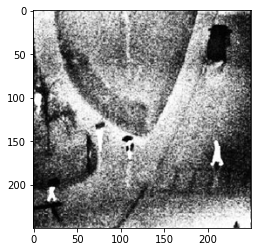

In [11]:
from matplotlib import image
from matplotlib import pyplot as plt

# load image as pixel array
image01 = image.imread('/content/image01.PNG',0)

# summarize shape of the pixel array
print(image01.dtype)
print(image01.shape)
print(image01.ndim)

# display the array of pixels as an input image
plt.imshow(image01)
plt.show()

In [13]:
## RGB to gray scale conversion
import numpy as np

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

image_gray = rgb2gray(image01)

In [15]:
m,n = image_gray.shape
# Developing filter(5, 5) mask 
mask = np.ones((5,5),np.float32)/25
# Convolve the 5X5 mask over the image  
img_new01 = np.zeros([m, n]) 

for i in range(2, m-2): 
    for j in range(2, n-2): 
        temp = image_gray[i-2, j-2]*mask[0, 0]+image_gray[i-1, j-2]*mask[0, 1]+image_gray[i, j - 2]*mask[0, 2]+image_gray[i+1, j-2]*mask[0, 3]+ image_gray[i+2, j-2]*mask[0, 4]+image_gray[i-2, j-1]*mask[1, 0]+image_gray[i-1, j-1]*mask[1, 1]+image_gray[i, j - 1]*mask[1, 2]+image_gray[i+1, j-1]*mask[1, 3]+ image_gray[i+2, j-1]*mask[1, 4]+image_gray[i-2, j]*mask[2, 0]+image_gray[i-1, j]*mask[2, 1]+image_gray[i, j]*mask[2, 2]+image_gray[i+1, j]*mask[2, 3]+ image_gray[i+2, j]*mask[2, 4]+image_gray[i-2, j+1]*mask[3, 0]+image_gray[i-1, j+1]*mask[3, 1]+image_gray[i, j+1]*mask[3, 2]+image_gray[i+1, j+1]*mask[3, 3]+ image_gray[i+2, j+1]*mask[3, 4]+image_gray[i-2, j+2]*mask[4, 0]+image_gray[i-1, j+2]*mask[4, 1]+image_gray[i, j+2]*mask[4, 2]+image_gray[i+1, j+2]*mask[4, 3]+ image_gray[i+2, j+2]*mask[4, 4]
        img_new01[i, j]= temp

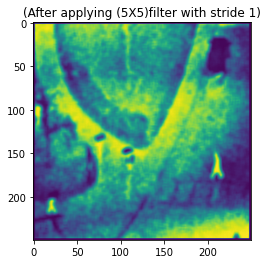

In [17]:
img_new01 = img_new01.astype(np.uint8)
plt.imshow(img_new01)
plt.title('(After applying (5X5)filter with stride 1)')
plt.show()

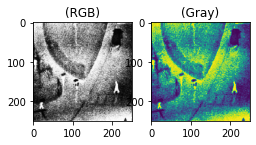

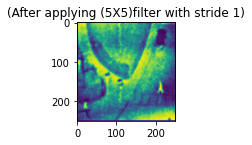

In [18]:
## display image
plt.subplot(2,3,1)
plt.imshow(image01)
plt.title('(RGB)')
plt.subplot(2,3,2)
plt.imshow(image_gray)
plt.title('(Gray)')
plt.show()
plt.subplot(2,3,3)
plt.imshow(img_new01)
plt.title('(After applying (5X5)filter with stride 1)')
plt.show()

In [19]:
## entropy of image
import skimage.measure 
entropy_FilImg01 = skimage.measure.shannon_entropy(img_new01)
print('Entropy of (5X5)Filtered Image: {}'.format(entropy_FilImg01))

Entropy of (5X5)Filtered Image: 7.836157105208616


In [33]:
cv2.imwrite('output01.png', img_new01)

True

In [35]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = cv2.imread("/content/image01.PNG")
     compressed = cv2.imread("/content/output01.png", 1)
     value = PSNR(original, compressed)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 28.456120625315783 dB


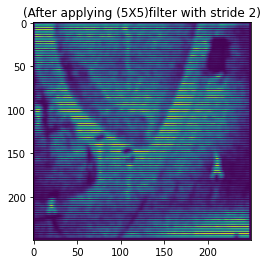

In [37]:
## with stride 2
img_new011 = np.zeros([m, n])
for i in range(2, m-2, 2): 
    for j in range(2, n-2): 
        temp = image_gray[i-2, j-2]*mask[0, 0]+image_gray[i-1, j-2]*mask[0, 1]+image_gray[i, j - 2]*mask[0, 2]+image_gray[i+1, j-2]*mask[0, 3]+ image_gray[i+2, j-2]*mask[0, 4]+image_gray[i-2, j-1]*mask[1, 0]+image_gray[i-1, j-1]*mask[1, 1]+image_gray[i, j - 1]*mask[1, 2]+image_gray[i+1, j-1]*mask[1, 3]+ image_gray[i+2, j-1]*mask[1, 4]+image_gray[i-2, j]*mask[2, 0]+image_gray[i-1, j]*mask[2, 1]+image_gray[i, j]*mask[2, 2]+image_gray[i+1, j]*mask[2, 3]+ image_gray[i+2, j]*mask[2, 4]+image_gray[i-2, j+1]*mask[3, 0]+image_gray[i-1, j+1]*mask[3, 1]+image_gray[i, j+1]*mask[3, 2]+image_gray[i+1, j+1]*mask[3, 3]+ image_gray[i+2, j+1]*mask[3, 4]+image_gray[i-2, j+2]*mask[4, 0]+image_gray[i-1, j+2]*mask[4, 1]+image_gray[i, j+2]*mask[4, 2]+image_gray[i+1, j+2]*mask[4, 3]+ image_gray[i+2, j+2]*mask[4, 4]
        img_new011[i, j]= temp

img_new011 = img_new011.astype(np.uint8)
plt.imshow(img_new011)
plt.title('(After applying (5X5)filter with stride 2)')
plt.show()

In [38]:
entropy_FilImg011 = skimage.measure.shannon_entropy(img_new011)
print('Entropy of (5X5)Filtered Image: {}'.format(entropy_FilImg011))

Entropy of (5X5)Filtered Image: 4.813825917744498


In [39]:
cv2.imwrite('output011.png', img_new011)

True

In [40]:
original = cv2.imread("/content/image01.PNG")
compressed = cv2.imread("/content/output011.png", 1)
value = PSNR(original, compressed)
print(f"PSNR value is {value} dB")

PSNR value is 28.14436850515659 dB


## Now do the same thing with other two images

In [44]:
image02 = image.imread('/content/image02.PNG',0)
image_gray = rgb2gray(image02)
m,n = image_gray.shape
# Developing filter(5, 5) mask 
mask = np.ones((5,5),np.float32)/25
# Convolve the 5X5 mask over the image  
img_new02 = np.zeros([m, n]) 

for i in range(2, m-2): 
    for j in range(2, n-2): 
        temp = image_gray[i-2, j-2]*mask[0, 0]+image_gray[i-1, j-2]*mask[0, 1]+image_gray[i, j - 2]*mask[0, 2]+image_gray[i+1, j-2]*mask[0, 3]+ image_gray[i+2, j-2]*mask[0, 4]+image_gray[i-2, j-1]*mask[1, 0]+image_gray[i-1, j-1]*mask[1, 1]+image_gray[i, j - 1]*mask[1, 2]+image_gray[i+1, j-1]*mask[1, 3]+ image_gray[i+2, j-1]*mask[1, 4]+image_gray[i-2, j]*mask[2, 0]+image_gray[i-1, j]*mask[2, 1]+image_gray[i, j]*mask[2, 2]+image_gray[i+1, j]*mask[2, 3]+ image_gray[i+2, j]*mask[2, 4]+image_gray[i-2, j+1]*mask[3, 0]+image_gray[i-1, j+1]*mask[3, 1]+image_gray[i, j+1]*mask[3, 2]+image_gray[i+1, j+1]*mask[3, 3]+ image_gray[i+2, j+1]*mask[3, 4]+image_gray[i-2, j+2]*mask[4, 0]+image_gray[i-1, j+2]*mask[4, 1]+image_gray[i, j+2]*mask[4, 2]+image_gray[i+1, j+2]*mask[4, 3]+ image_gray[i+2, j+2]*mask[4, 4]
        img_new02[i, j]= temp

entropy_FilImg02 = skimage.measure.shannon_entropy(img_new02)
print('Entropy of (5X5)Filtered Image: {}'.format(entropy_FilImg02))

cv2.imwrite('output02.png', img_new02)

Entropy of (5X5)Filtered Image: 11.579099158598519


True

In [45]:
original = cv2.imread("/content/image02.PNG")
compressed = cv2.imread("/content/output02.png", 1)
value = PSNR(original, compressed)
print(f"PSNR value is {value} dB")

PSNR value is 34.302603791421156 dB


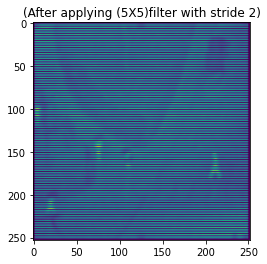

In [46]:
## with stride 2
img_new022 = np.zeros([m, n])
for i in range(2, m-2, 2): 
    for j in range(2, n-2): 
        temp = image_gray[i-2, j-2]*mask[0, 0]+image_gray[i-1, j-2]*mask[0, 1]+image_gray[i, j - 2]*mask[0, 2]+image_gray[i+1, j-2]*mask[0, 3]+ image_gray[i+2, j-2]*mask[0, 4]+image_gray[i-2, j-1]*mask[1, 0]+image_gray[i-1, j-1]*mask[1, 1]+image_gray[i, j - 1]*mask[1, 2]+image_gray[i+1, j-1]*mask[1, 3]+ image_gray[i+2, j-1]*mask[1, 4]+image_gray[i-2, j]*mask[2, 0]+image_gray[i-1, j]*mask[2, 1]+image_gray[i, j]*mask[2, 2]+image_gray[i+1, j]*mask[2, 3]+ image_gray[i+2, j]*mask[2, 4]+image_gray[i-2, j+1]*mask[3, 0]+image_gray[i-1, j+1]*mask[3, 1]+image_gray[i, j+1]*mask[3, 2]+image_gray[i+1, j+1]*mask[3, 3]+ image_gray[i+2, j+1]*mask[3, 4]+image_gray[i-2, j+2]*mask[4, 0]+image_gray[i-1, j+2]*mask[4, 1]+image_gray[i, j+2]*mask[4, 2]+image_gray[i+1, j+2]*mask[4, 3]+ image_gray[i+2, j+2]*mask[4, 4]
        img_new022[i, j]= temp

img_new022 = img_new022.astype(np.uint8)
plt.imshow(img_new022)
plt.title('(After applying (5X5)filter with stride 2)')
plt.show()

In [47]:
entropy_FilImg012 = skimage.measure.shannon_entropy(img_new022)
print('Entropy of (5X5)Filtered Image: {}'.format(entropy_FilImg012))
cv2.imwrite('output022.png', img_new022)

Entropy of (5X5)Filtered Image: 3.7124328122257064


True

In [48]:
original = cv2.imread("/content/image02.PNG")
compressed = cv2.imread("/content/output022.png", 1)
value = PSNR(original, compressed)
print(f"PSNR value is {value} dB")

PSNR value is 30.243602278333643 dB


## Checking the same with third Image

In [49]:
image03 = image.imread('/content/image03.PNG',0)
image_gray = rgb2gray(image03)
m,n = image_gray.shape
# Developing filter(5, 5) mask 
mask = np.ones((5,5),np.float32)/25
# Convolve the 5X5 mask over the image  
img_new03 = np.zeros([m, n]) 

for i in range(2, m-2): 
    for j in range(2, n-2): 
        temp = image_gray[i-2, j-2]*mask[0, 0]+image_gray[i-1, j-2]*mask[0, 1]+image_gray[i, j - 2]*mask[0, 2]+image_gray[i+1, j-2]*mask[0, 3]+ image_gray[i+2, j-2]*mask[0, 4]+image_gray[i-2, j-1]*mask[1, 0]+image_gray[i-1, j-1]*mask[1, 1]+image_gray[i, j - 1]*mask[1, 2]+image_gray[i+1, j-1]*mask[1, 3]+ image_gray[i+2, j-1]*mask[1, 4]+image_gray[i-2, j]*mask[2, 0]+image_gray[i-1, j]*mask[2, 1]+image_gray[i, j]*mask[2, 2]+image_gray[i+1, j]*mask[2, 3]+ image_gray[i+2, j]*mask[2, 4]+image_gray[i-2, j+1]*mask[3, 0]+image_gray[i-1, j+1]*mask[3, 1]+image_gray[i, j+1]*mask[3, 2]+image_gray[i+1, j+1]*mask[3, 3]+ image_gray[i+2, j+1]*mask[3, 4]+image_gray[i-2, j+2]*mask[4, 0]+image_gray[i-1, j+2]*mask[4, 1]+image_gray[i, j+2]*mask[4, 2]+image_gray[i+1, j+2]*mask[4, 3]+ image_gray[i+2, j+2]*mask[4, 4]
        img_new03[i, j]= temp

entropy_FilImg03 = skimage.measure.shannon_entropy(img_new03)
print('Entropy of (5X5)Filtered Image: {}'.format(entropy_FilImg03))

cv2.imwrite('output02.png', img_new03)

Entropy of (5X5)Filtered Image: 8.853169882014754


True

In [50]:
original = cv2.imread("/content/image03.PNG")
compressed = cv2.imread("/content/output02.png", 1)
value = PSNR(original, compressed)
print(f"PSNR value is {value} dB")

PSNR value is 32.16955541727923 dB


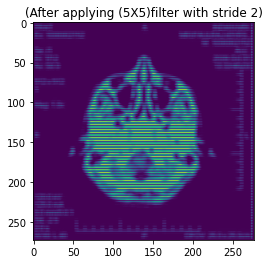

In [51]:
## with stride 2
img_new033 = np.zeros([m, n])
for i in range(2, m-2, 2): 
    for j in range(2, n-2): 
        temp = image_gray[i-2, j-2]*mask[0, 0]+image_gray[i-1, j-2]*mask[0, 1]+image_gray[i, j - 2]*mask[0, 2]+image_gray[i+1, j-2]*mask[0, 3]+ image_gray[i+2, j-2]*mask[0, 4]+image_gray[i-2, j-1]*mask[1, 0]+image_gray[i-1, j-1]*mask[1, 1]+image_gray[i, j - 1]*mask[1, 2]+image_gray[i+1, j-1]*mask[1, 3]+ image_gray[i+2, j-1]*mask[1, 4]+image_gray[i-2, j]*mask[2, 0]+image_gray[i-1, j]*mask[2, 1]+image_gray[i, j]*mask[2, 2]+image_gray[i+1, j]*mask[2, 3]+ image_gray[i+2, j]*mask[2, 4]+image_gray[i-2, j+1]*mask[3, 0]+image_gray[i-1, j+1]*mask[3, 1]+image_gray[i, j+1]*mask[3, 2]+image_gray[i+1, j+1]*mask[3, 3]+ image_gray[i+2, j+1]*mask[3, 4]+image_gray[i-2, j+2]*mask[4, 0]+image_gray[i-1, j+2]*mask[4, 1]+image_gray[i, j+2]*mask[4, 2]+image_gray[i+1, j+2]*mask[4, 3]+ image_gray[i+2, j+2]*mask[4, 4]
        img_new033[i, j]= temp

img_new033 = img_new033.astype(np.uint8)
plt.imshow(img_new033)
plt.title('(After applying (5X5)filter with stride 2)')
plt.show()

In [52]:
entropy_FilImg013 = skimage.measure.shannon_entropy(img_new033)
print('Entropy of (5X5)Filtered Image: {}'.format(entropy_FilImg013))
cv2.imwrite('output033.png', img_new033)

Entropy of (5X5)Filtered Image: 2.8172164005828484


True

In [53]:
original = cv2.imread("/content/image03.PNG")
compressed = cv2.imread("/content/output033.png", 1)
value = PSNR(original, compressed)
print(f"PSNR value is {value} dB")

PSNR value is 32.79232325575511 dB
